# Removing low quality cells

This is based on a lecture at the Harvard Chan Bioinformatics Core. Which can be read here:   
https://hbctraining.github.io/scRNA-seq/lessons/04_SC_quality_control.html  
  
#### Goals:

 * To filter the data to only include true cells that are of high quality
 * To identify any failed samples and either try to salvage the data or remove from analysis, in addition to, trying to understand why the sample failed
 
#### Questions about their method
  
* They filter out the top left, bottom left and bottom right quadrants along with most B-cells due to low Genes per UMI rates? This does not correspond to the bottom left quadrant being the low quality cells

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/rna_metadata.csv")
df.drop(["Unnamed: 0"], inplace=True, axis=1)

In [5]:
df["log10GenesPerUMI"] = np.log10(df.nGene)/np.log10(df.nUMI)

### Two methods to filter out cells
1. One can include based on threshold to eliminate three quadrants (what they do but don't say), eliminates 4546 cells
2. One can eliminate the bottom left quadrant (what they say but don't do), eliminates 439 cells

In the lecture they say that lower left quadrant cells are low quality and that lower right quadrant cell can be less complex cells and dying cells. 

For our purposes

#### Method 1

In [94]:
hq_df_1 = df.loc[df['nGene'] >= 250].loc[df['nUMI'] >= 500].loc[df['log10GenesPerUMI'] >= 0.8]

In [84]:
df.shape[0]-hq_df_1.shape[0]

4546

In [88]:
lq_df_1 = df.drop(hq_df_1.index)

The cells that are removed by method 1 are as follows:

In [92]:
lq_df_1.groupby("CellType").count().Cell

CellType
B_cell         732
Cancer        3285
DC               0
EC             156
Fibroblast     234
Mast             9
Myeloid          8
T_cell         122
Name: Cell, dtype: int64

In [188]:
df.groupby("CellType").count().Cell-lq_df_1.groupby("CellType").count().Cell

CellType
B_cell         1965
Cancer        12950
DC              362
EC             1963
Fibroblast     5654
Mast            354
Myeloid        1957
T_cell        14273
Name: Cell, dtype: int64

#### Method 2

In [86]:
lq_df_2 = df.loc[df['nGene'] < 250].loc[df['nUMI'] < 500]

In [87]:
lq_df_2.shape[0]

439

In [97]:
hq_df_2 = df.drop(lq_df_2.index)

In [93]:
lq_df_2.groupby("CellType").count().Cell

CellType
B_cell          1
Cancer        403
DC              0
EC              5
Fibroblast     24
Mast            2
Myeloid         0
T_cell          4
Name: Cell, dtype: int64

In [141]:
order = df.groupby("CellType").count().Cell.sort_values(ascending=False).index

In [49]:
df['CellType'] = pd.Categorical(df['CellType'])

### Plot below focuses on cancer cells (orange)

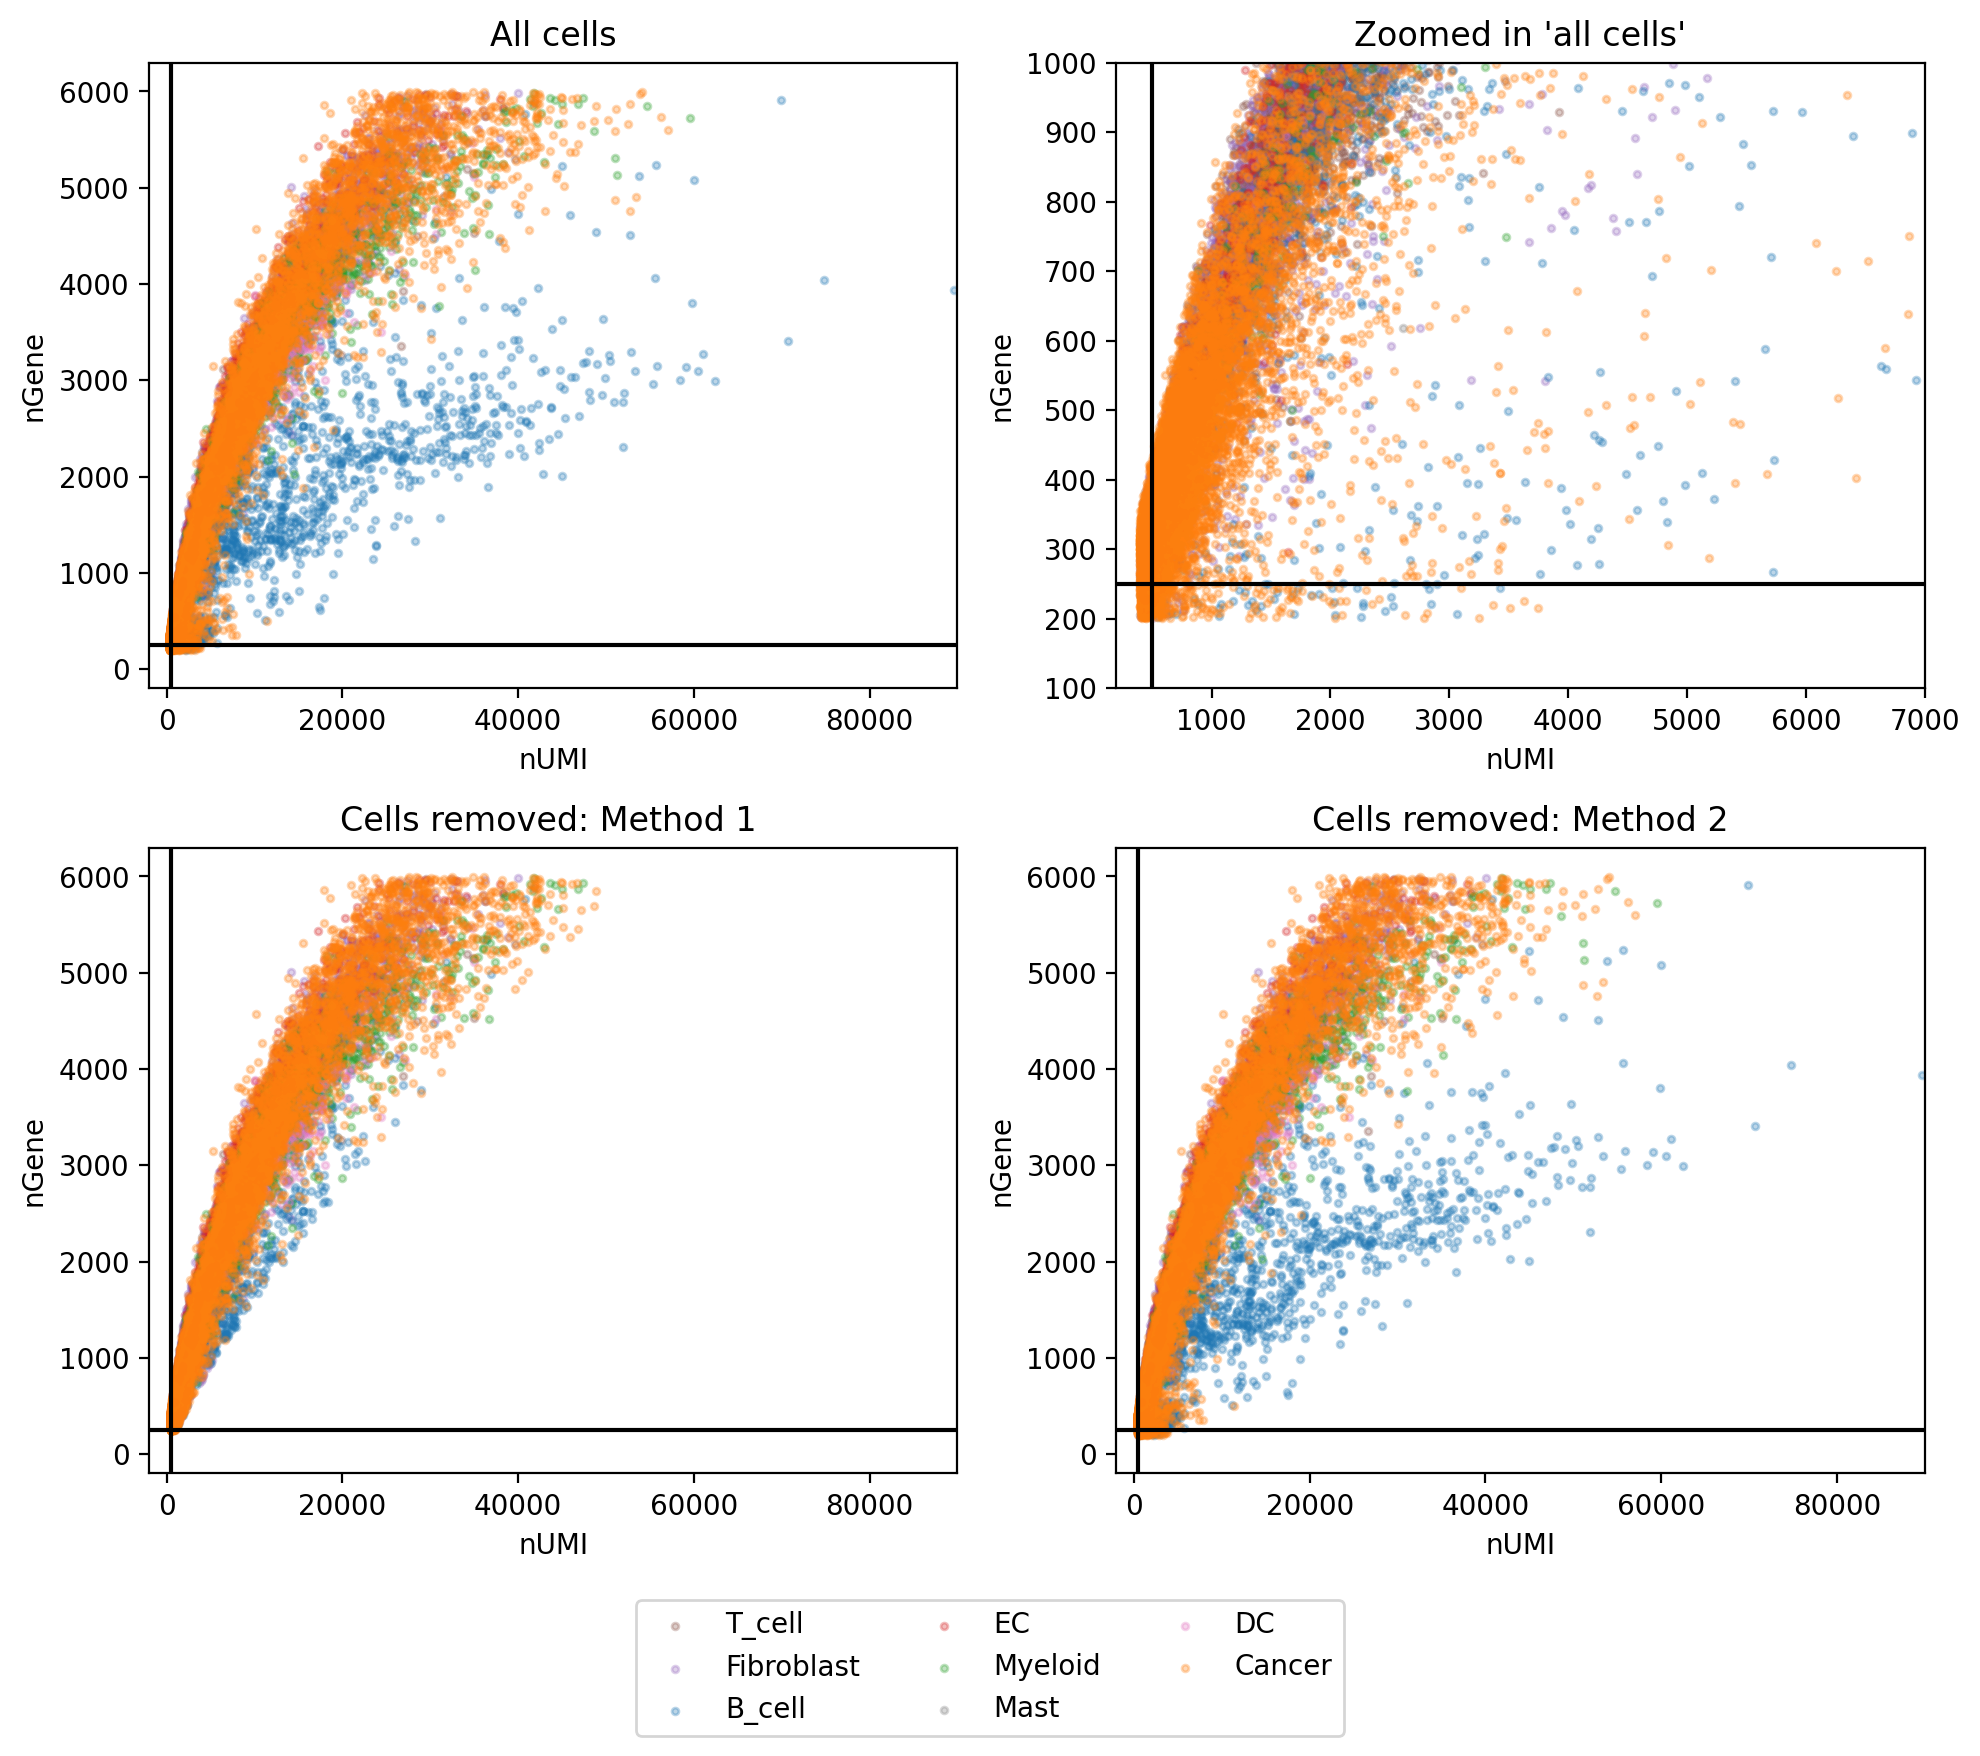

In [158]:
plot_cell_types()

### Plot below shows all cells

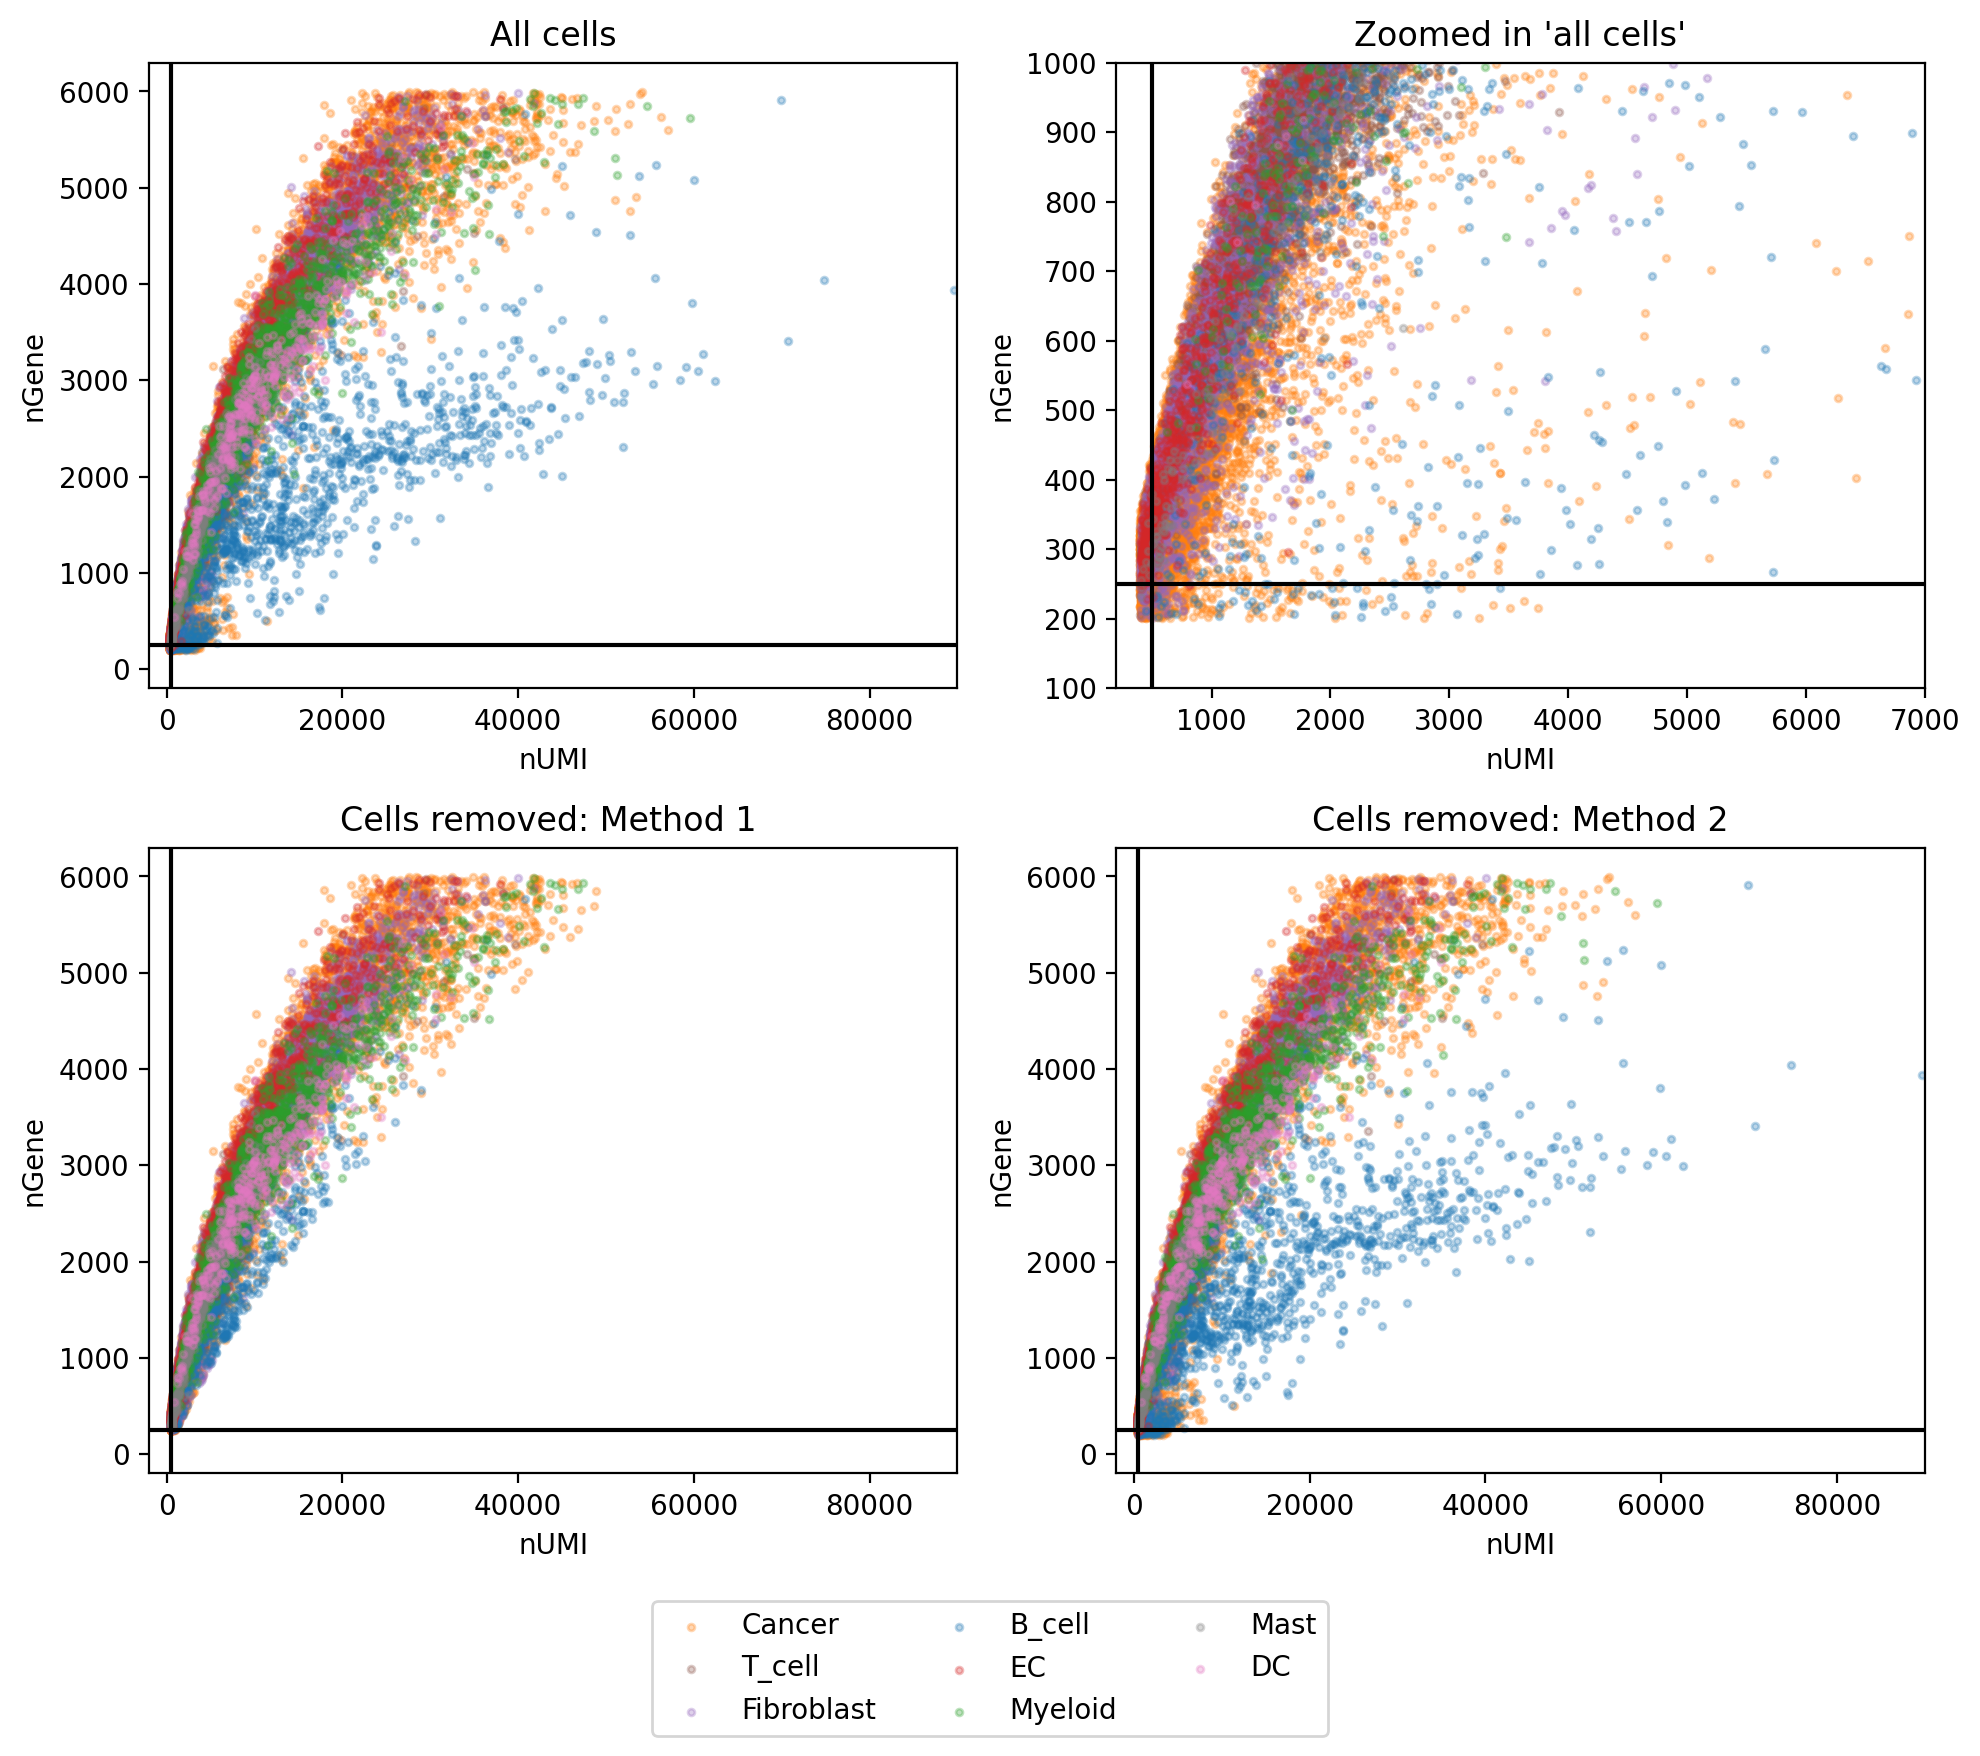

In [191]:
plot_cell_types(cancer_top=False)

In [168]:
colors = {"B_cell" : "C0"
         , "EC" : "C3"
         , "Myeloid" : "C2"
         , "Cancer" : "C1"
         , "Fibroblast" : "C4"
         , "T_cell" : "C5"
         , "DC" : "C6"
         , "Mast" : "C7"
         }

In [194]:
def plot_cell_types(cancer_top=True):
    fig, axs = plt.subplots(2,1,figsize=(10,8), dpi=200)
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[0][1].scatter(df.loc[df['CellType'] == category].nUMI, df.loc[df['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[0][1].scatter(df.loc[df['CellType'] == "Cancer"].nUMI, df.loc[df['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[0][1].vlines(500,-200,6300, color="black")
    axs[0][1].hlines(250,-2000,100000, color="black")
    axs[0][1].set_ylim((100,1000))
    axs[0][1].set_xlim((200,7000))
    axs[0][1].set_xlabel("nUMI")
    axs[0][1].set_ylabel("nGene")
    axs[0][1].set_title("Zoomed in 'all cells'")
    #axs[0].legend()
    """
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[0][0].scatter(df.loc[df['CellType'] == category].nUMI, df.loc[df['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[0][0].scatter(df.loc[df['CellType'] == "Cancer"].nUMI, df.loc[df['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[0][0].vlines(500,-200,6300, color="black")
    axs[0][0].hlines(250,-2000,90000, color="black")
    axs[0][0].set_ylim((-200,6300))
    axs[0][0].set_xlim((-2000,90000))
    axs[0][0].set_xlabel("nUMI")
    axs[0][0].set_ylabel("nGene")
    axs[0][0].set_title("All cells")
    """
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[0][1].scatter(hq_df_1.loc[hq_df_1['CellType'] == category].nUMI, hq_df_1.loc[hq_df_1['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[0][1].scatter(hq_df_1.loc[hq_df_1['CellType'] == "Cancer"].nUMI, hq_df_1.loc[hq_df_1['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[0][1].vlines(500,-300,6300, color="black")
    axs[0][1].hlines(250,-2000,100000, color="black")
    axs[0][1].set_ylim((-200,6300))
    axs[0][1].set_xlim((-2000,90000))
    axs[0][1].set_xlabel("nUMI")
    axs[0][1].set_ylabel("nGene")
    axs[0][1].set_title('Cells removed: Method 1 ')

    """
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[1][1].scatter(hq_df_2.loc[hq_df_2['CellType'] == category].nUMI, hq_df_2.loc[hq_df_2['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[1][1].scatter(hq_df_2.loc[hq_df_2['CellType'] == "Cancer"].nUMI, hq_df_2.loc[hq_df_2['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[1][1].vlines(500,-300,6300, color="black")
    axs[1][1].hlines(250,-2000,100000, color="black")
    axs[1][1].set_ylim((-200,6300))
    axs[1][1].set_xlim((-2000,90000))
    axs[1][1].set_xlabel("nUMI")
    axs[1][1].set_ylabel("nGene")
    axs[1][1].set_title('Cells removed: Method 2')
    """
    handles, labels = axs[1][1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.1))
    fig.tight_layout()

In [226]:
def plot_cell_types(cancer_top=True, zoomed=True):
    fig, axs = plt.subplots(2,1,figsize=(10,8), dpi=200)
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[0].scatter(df.loc[df['CellType'] == category].nUMI, df.loc[df['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[0].scatter(df.loc[df['CellType'] == "Cancer"].nUMI, df.loc[df['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[0].vlines(500,-200,6300, color="black")
    axs[0].hlines(250,-2000,100000, color="black")
    if zoomed:
            axs[0].set_ylim((100,1000))
            axs[0].set_xlim((200,7142.8))
    else:
            axs[0].set_ylim((-200,6300))
            axs[0].set_xlim((-2000,90000))
    axs[0].set_xlabel("nUMI")
    axs[0].set_ylabel("nGene")
    axs[0].set_title("All cells")
    #axs[0].legend()
 
    for category in order:
        if cancer_top:
            if category=="Cancer":
                continue
        axs[1].scatter(hq_df_1.loc[hq_df_1['CellType'] == category].nUMI, hq_df_1.loc[hq_df_1['CellType'] == category].nGene, s=6, alpha=0.3, label=category, color=colors[category])
    if cancer_top:
        axs[1].scatter(hq_df_1.loc[hq_df_1['CellType'] == "Cancer"].nUMI, hq_df_1.loc[hq_df_1['CellType'] == "Cancer"].nGene, s=6, alpha=0.3, label="Cancer", color=colors["Cancer"])
    axs[1].vlines(500,-300,6300, color="black")
    axs[1].hlines(250,-2000,100000, color="black")
    if zoomed:
            axs[1].set_ylim((100,1000))
            axs[1].set_xlim((200,7142.8))
    else:
            axs[1].set_ylim((-200,6300))
            axs[1].set_xlim((-2000,90000))
    axs[1].set_xlabel("nUMI")
    axs[1].set_ylabel("nGene")
    axs[1].set_title('Cells removed: Method 1 ')

    handles, labels = axs[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc="center right", ncol=1, bbox_to_anchor=(1.12, 0.5))
    fig.tight_layout()

In [ ]:
plot_cell_types(False, True)

In [167]:
high_q_cells = {"B_cell" : hq_df_1[hq_df_1.CellType == "B_cell"].Cell.values
         , "EC" : hq_df_1[hq_df_1.CellType == "EC"].Cell.values
         , "Myeloid" : hq_df_1[hq_df_1.CellType == "Myeloid"].Cell.values
         , "Cancer" : hq_df_1[hq_df_1.CellType == "Cancer"].Cell.values
         , "Fibroblast" : hq_df_1[hq_df_1.CellType == "Fibroblast"].Cell.values
         , "T_cell" : hq_df_1[hq_df_1.CellType == "T_cell"].Cell.values
         , "DC" : hq_df_1[hq_df_1.CellType == "DC"].Cell.values
         , "Mast" : hq_df_1[hq_df_1.CellType == "Mast"].Cell.values
         }

### Save high quality cells

In [169]:
import pickle

In [171]:
with open('/data/severs/high_q_cell_names.pkl', 'wb') as handle:
    pickle.dump(high_q_cells, handle)